In [1]:
#Dataset
from keras.datasets import cifar10
#Modelo
from keras.models import Sequential
#Camadas 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
#Atributos da rede
from keras import optimizers, losses, regularizers
#Ferramentas uteis
from keras.utils import to_categorical
#Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
#Predição
from random import randint
import matplotlib.pyplot as plt
from numpy import argmax
#Carrrega uma rede ja treinada
from keras.models import load_model
###Bibliotecas da SOM

#Self Organizing Map
from minisom import MiniSom

import matplotlib.pyplot as plt
import numpy as np
import pickle
from keras import models
import random

Using TensorFlow backend.
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
batch_size = 100
epochs = 5
num_classes = 10
decay = 1e-3
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print('X TRAIN: ',x_train.shape)
print('Y TRAIN: ',y_train.shape)
print('X TEST: ',x_test.shape)
print('Y TEST: ',y_test.shape)

model = load_model('/home/gustavo/JUPITER-LAB/SOM_Cifar10/CNN_37_CIFAR10.h5')

'''
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000, activation='sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(500, activation='sigmoid'))

model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))
'''
model.summary()

'''

optimizer = optimizers.rmsprop(lr=0.001, decay=1e-6)
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=1, fill_mode='nearest', horizontal_flip=True, vertical_flip=True)
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train, batch_size), epochs=epochs, validation_data=(x_test, y_test), shuffle=True, steps_per_epoch=len(x_train)/batch_size, workers=1)
#model.fit(x_train, y_train, batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

'''
#score = model.evaluate(x_test, y_test, verbose=1)
#print("Test score: ", score[0])
#print("Test accuracy: ", score[1])

X TRAIN:  (50000, 32, 32, 3)
Y TRAIN:  (50000, 10)
X TEST:  (10000, 32, 32, 3)
Y TEST:  (10000, 10)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activ

"\n\noptimizer = optimizers.rmsprop(lr=0.001, decay=1e-6)\nmodel.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])\ndatagen = ImageDataGenerator(rotation_range=20, width_shift_range=1, fill_mode='nearest', horizontal_flip=True, vertical_flip=True)\ndatagen.fit(x_train)\nmodel.fit_generator(datagen.flow(x_train, y_train, batch_size), epochs=epochs, validation_data=(x_test, y_test), shuffle=True, steps_per_epoch=len(x_train)/batch_size, workers=1)\n#model.fit(x_train, y_train, batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)\n\n"

In [3]:
###FUNCOES E OPERACOES REFERENTES AO TRATAMENTO DOS DADOS ANTES DO SOM

#Imprime os nomes das camadas do modelo
j = 0
for i in model.layers:
    print(j, ' - ', i.name)
    j += 1

data = np.concatenate((x_train, x_test))
labels = np.concatenate((y_train, y_test))
data.shape

0  -  conv2d_1
1  -  activation_1
2  -  batch_normalization_1
3  -  conv2d_2
4  -  activation_2
5  -  batch_normalization_2
6  -  max_pooling2d_1
7  -  dropout_1
8  -  conv2d_3
9  -  activation_3
10  -  batch_normalization_3
11  -  conv2d_4
12  -  activation_4
13  -  batch_normalization_4
14  -  max_pooling2d_2
15  -  dropout_2
16  -  conv2d_5
17  -  activation_5
18  -  batch_normalization_5
19  -  conv2d_6
20  -  activation_6
21  -  batch_normalization_6
22  -  max_pooling2d_3
23  -  dropout_3
24  -  flatten_1
25  -  dense_1
26  -  dropout_4
27  -  dense_2
28  -  dense_3
29  -  dropout_5
30  -  dense_4


(60000, 32, 32, 3)

In [4]:
#Função que retorna o feature vector de uma determinada camada, dada uma imagem
def get_layer(model, image, layer_num):
    out = []
    layer_outputs = model.layers[layer_num].output
    # Extracts the outputs of the top 12 layers

    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
    # Creates a model that will return these outputs, given the model input

    layer = activation_model.predict(image)
    layer = layer[0]
    layer = layer.reshape(np.prod(layer.shape))
    out.append(layer)
    return out

class SymbolicLayer:
    
    def __init__(self, layer_input_size, soms_num, soms_sizes, output_size, learning_rate = 0.05, sigma = 3):
        self.layer_input_size = layer_input_size
        self.output_size = output_size
        self. soms_num = soms_num
        self.soms_sizes = soms_sizes
        self.learning_rate = learning_rate 
        self.sigma = sigma
        self.last_layer_input_size = sum(np.prod(som_shape) for som_shape in self.soms_sizes)
        self.layer_branches = []
        if (self.layer_input_size%self.soms_num == 0):
            self.soms_input_size = self.layer_input_size/self.soms_num
            for i in range(self.soms_num):
                self.layer_branches.append(MiniSom(int(self.soms_sizes[i][0]), int(self.soms_sizes[i][1]), int(self.soms_input_size), self.sigma, self.learning_rate))        
        self.out_layer = MiniSom(int(self.output_size[0]), int(self.output_size[1]), self.last_layer_input_size, self.sigma, self.learning_rate)
        
        
    def layerTrain(self, train_feature_maps):
        for j in range(len(train_feature_maps)):
            layer_input = []
            for i in range(self.soms_num):
                feature_map = train_feature_maps[j][0][int(i*self.soms_input_size):int((i+1)*self.soms_input_size)]
                #print(i, ' ', j, ' ', np.shape(feature_map))
                feature_map = feature_map.reshape((1, int(self.soms_input_size)))
                self.layer_branches[i].train(feature_map, 1)
                layer_input.append(np.reshape( self.layer_branches[i].activate(feature_map), (int(self.soms_sizes[i][0])*int(self.soms_sizes[i][1]))))
            layer_input = np.concatenate(layer_input)
            layer_input = np.reshape(layer_input, (1, self.last_layer_input_size))
            self.out_layer.train(layer_input, 1)
            
    def get_feature_maps(self, model, input_images, layer, verbose=True):
        #Passa os n primeiros elementos do dataset pela rede, pega o feature_vector de uma camada layer
        training_data = []
        cont = 1
        for image in input_images:
            image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
            image = get_layer(model, image, layer)
            image = np.reshape(image, (1, self.layer_input_size))
            training_data.append(image)
            if(verbose):
                if(cont%500 == 0):
                    print('Completo: ', cont)
                cont+=1
        return training_data
    
    def get_prediction_maps(self, feature_map):
        layer_input = []
        for i in range(self.soms_num):
            partial_feature_map = feature_map[0][0][int(i*self.soms_input_size):int((i+1)*self.soms_input_size)]
            partial_feature_map = partial_feature_map.reshape((1, int(self.soms_input_size)))
            layer_input.append(np.reshape( self.layer_branches[i].activate(partial_feature_map), (int(self.soms_sizes[i][0])*int(self.soms_sizes[i][1]))))
        layer_input = np.concatenate(layer_input)
        layer_input = np.reshape(layer_input, (1, self.last_layer_input_size))
        out = self.out_layer.activate(layer_input)
        f_min, f_max = np.amin(out), np.amax(out)
        out = (out - f_min) / (f_max - f_min)
        return out
            

In [5]:
layer = 14
training_data_size = 8000
simb_layer = SymbolicLayer(4096, 4, ((15, 15), (10, 10), (10, 10), (15, 15)), (40, 40))

simb_layer.layerTrain(simb_layer.get_feature_maps(model, data[:training_data_size], layer))

Completo:  500
Completo:  1000
Completo:  1500
Completo:  2000
Completo:  2500
Completo:  3000
Completo:  3500
Completo:  4000
Completo:  4500
Completo:  5000
Completo:  5500
Completo:  6000
Completo:  6500
Completo:  7000
Completo:  7500
Completo:  8000


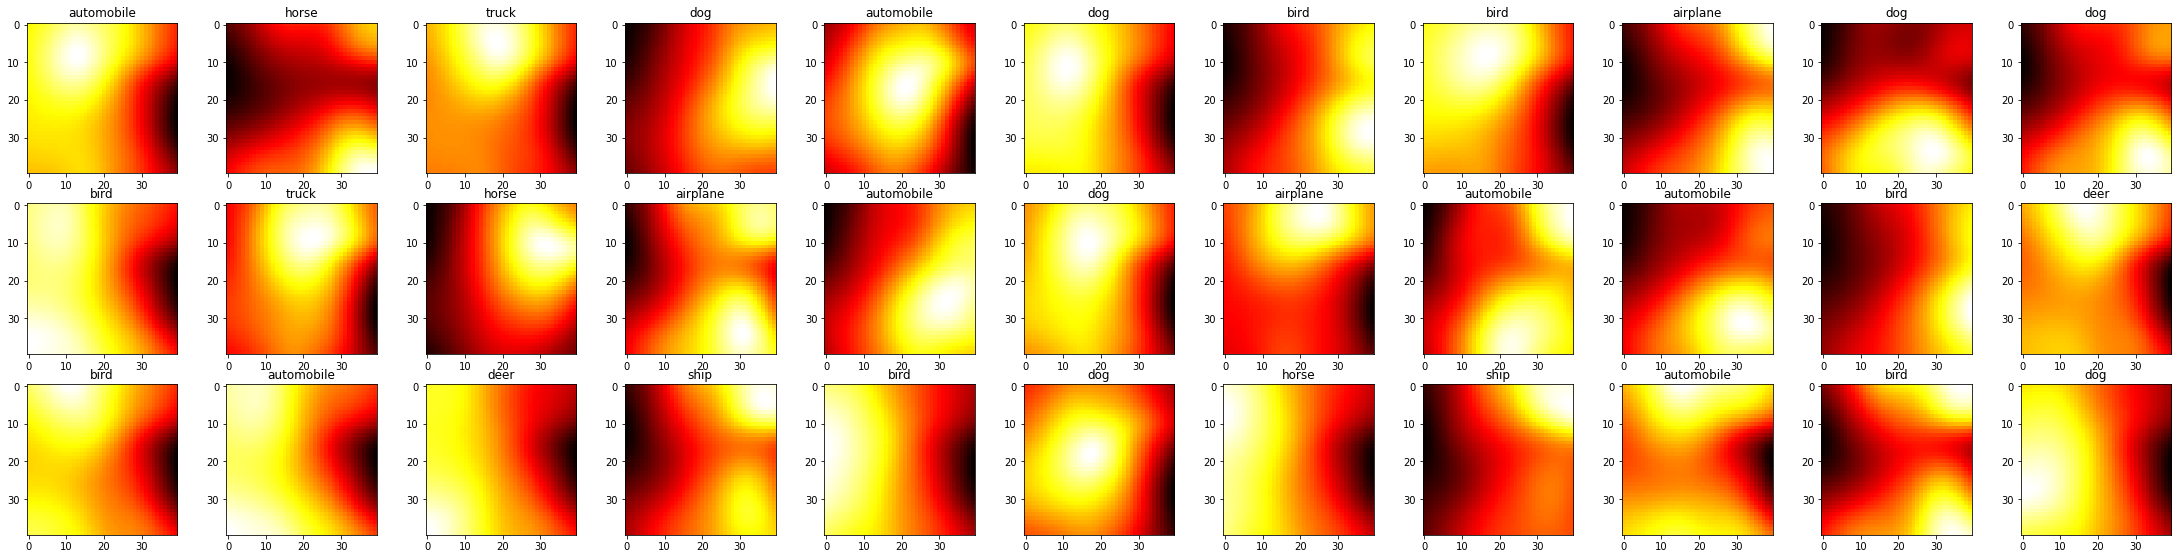

In [7]:
j=1
for i in range(33):
    n = random.randint(50000, 60000)
    test_data = simb_layer.get_feature_maps(model, [data[n]], layer, verbose=False)
    out = simb_layer.get_prediction_maps(test_data)
    f_min, f_max = np.amin(out), np.amax(out)
    out = (out - f_min) / (f_max - f_min)
    out = 1-out
    plt.subplot(len(out), 11, j)
    plt.imshow(out, cmap='hot')
    label = classes[argmax(labels[n])]
    j+=1
    plt.title(label)
plt.subplots_adjust(left=0, bottom=0, right=5, top=25, wspace=0.2, hspace=0.2)
plt.show()
    

In [ ]:
layer2 = 6
simb_layer_2 = SymbolicLayer(8192, 4, ((15, 15), (10, 10), (10, 10), (15, 15)), (40, 40))

simb_layer_2.layerTrain(simb_layer_2.get_feature_maps(model, data[:training_data_size], layer2))

Completo:  500
Completo:  1000
Completo:  1500
Completo:  2000
Completo:  2500
Completo:  3000
Completo:  3500
Completo:  4000
Completo:  4500
Completo:  5000
Completo:  5500


In [ ]:
j=1
for i in range(33):
    n = random.randint(50000, 60000)
    test_data = simb_layer_2.get_feature_maps(model, [data[n]], layer2, verbose=False)
    out = simb_layer_2.get_prediction_maps(test_data)
    f_min, f_max = np.amin(out), np.amax(out)
    out = (out - f_min) / (f_max - f_min)
    out = 1-out
    plt.subplot(len(out), 11, j)
    plt.imshow(out, cmap='hot')
    label = classes[argmax(labels[n])]
    j+=1
    plt.title(label)
plt.subplots_adjust(left=0, bottom=0, right=5, top=25, wspace=0.2, hspace=0.2)
plt.show()